# Data & insights for regular newsletter

In [1]:
import bittensor as bt
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta
from substrateinterface import SubstrateInterface

/Users/gustave/miniconda3/envs/bittensor/lib/python3.10/site-packages/eth_utils/network.py:44: UserWarning: Network 345 with name 'Yooldo Verse Mainnet' does not have a valid ChainId. eth-typing should be updated with the latest networks.
  warnings.warn(
/Users/gustave/miniconda3/envs/bittensor/lib/python3.10/site-packages/eth_utils/network.py:44: UserWarning: Network 12611 with name 'Astar zkEVM' does not have a valid ChainId. eth-typing should be updated with the latest networks.
  warnings.warn(


In [2]:
subtensor = bt.subtensor('archive')
substrate = SubstrateInterface(url="wss://archive.chain.opentensor.ai:443/")
block = substrate.get_block()['header']['number']
print(block)

3218662


In [3]:
step = 7200
period_in_days = 14
blocks = range(block - step*period_in_days, block, 7200)
#jour block 2735000: 10 avril
# find block timestamp
today = datetime.today().date()
start_date = (today - relativedelta(days=period_in_days))
days_since_start = 0
print(block, blocks)

3218662 range(3117862, 3218662, 7200)


In [4]:
emissions_latest = {}
for i in range(0, 39):  # change the range when subnet counts increases
    emissions_latest[i] = float(subtensor.get_emission_value_by_subnet(i, block)) 

# get top 10, bottom 10, and middle subnets subnets   
sorted_dict = dict(sorted(emissions_latest.items(), key=lambda item: item[1], reverse=True))
top10_subnets = list(sorted_dict.keys())[:10]
bottom10_subnets = list(sorted_dict.keys())[-10:]
middle_subnets= [value for value in range(0, 39) if value not in set(top10_subnets + bottom10_subnets)]

In [5]:
emissions_data_top10 = {}
emissions_data_bottom10 = {}
emissions_data_middle = {}

for block in blocks:
    top10_subnets_emissions = {}
    bottom10_subnets_emissions = {}
    middle_subnets_emissions = {}

    date = (start_date + relativedelta(days=days_since_start)).strftime('%Y-%m-%d')
    days_since_start += 1
    # print(block, date)

    for i in top10_subnets:
        top10_subnets_emissions[i]= float(subtensor.get_emission_value_by_subnet(i, block))
    emissions_data_top10[date] = top10_subnets_emissions

    
    for i in bottom10_subnets:
        bottom10_subnets_emissions[i]= float(subtensor.get_emission_value_by_subnet(i, block))
    emissions_data_bottom10[date] = bottom10_subnets_emissions

    
    for i in middle_subnets:
        middle_subnets_emissions[i]= float(subtensor.get_emission_value_by_subnet(i, block))
    emissions_data_middle[date] = middle_subnets_emissions

emissions_data_top10 = pd.DataFrame(emissions_data_top10).T
emissions_data_bottom10 = pd.DataFrame(emissions_data_bottom10).T
emissions_data_middle = pd.DataFrame(emissions_data_middle).T

In [6]:
print(emissions_data_top10.iloc[-1].sum())
print(emissions_data_middle.iloc[-1].sum())
print(emissions_data_bottom10.iloc[-1].sum())
print(emissions_data_top10.iloc[-1].sum() + emissions_data_middle.iloc[-1].sum() + emissions_data_bottom10.iloc[-1].sum())

0.729680523
0.264157093
0.0061623649999999995
0.999999981


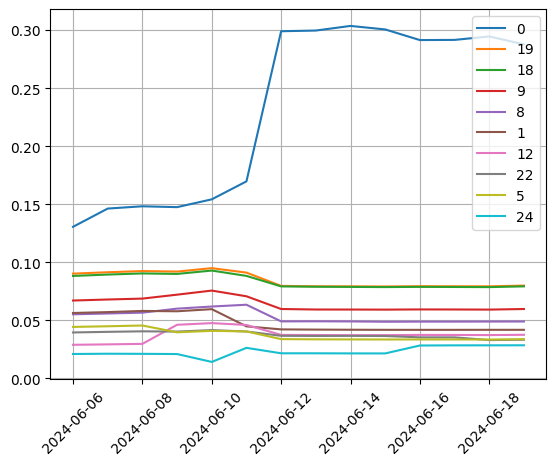

In [7]:
emissions_data_top10.plot(kind='line')
plt.xticks(rotation=45)
plt.grid()
plt.show()